<a href="https://colab.research.google.com/github/ArindamBanerji/wip-experiments/blob/master/misc/Combined_transformer_scaffolding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setup the environment
! pip install yfinance numpy pandas matplotlib scikit-learn pyts torch einops vit-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
%matplotlib inline

In [3]:
!nvidia-smi

Sun Aug 18 08:20:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   36C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# set some variables + make sure to use GPU
root_dir = "/content/" #root dir that coalb uses
version_number = 'v32' # use a output version number
base_dir = "/content/drive/MyDrive/python-projects/kaggle_experiments/Transformer-TS/v2/" # local directory for execution
fnm = "combined_forecasting_coordinator.py" # name of python file from repo
default_batch_sz = 33 # set batch size - not being used
parse_args = True # not needed but code allows simple invocation

In [5]:
# go to the root directory - helps for the git pulls
import os
os.chdir(root_dir)

In [6]:
# change directory into the local repo
import os

cwd = os.getcwd()
if (os.path.samefile(cwd, base_dir) == False) :
    os.chdir(base_dir)

In [7]:
#basic test to make sure that the file exists - should probably exit code
! (test -f "$fnm" && echo "file-exists") || echo "file-not-exists"

file-exists


In [8]:
# Option #2: dynamic import and call the main entry point.- do arg parse
import sys
import os
import importlib
import traceback  # Import traceback for error handling
import argparse  # Import argparse for command-line argument parsing

# does the heavy lifting of the call to vision-transformer code
def invoke_ViT_TS_args (default_batch_sz, base_dir, fnm, version_num) :

    print ("batch_sz", default_batch_sz)

    # check for fike path
    file_exists = os.path.exists(os.path.join(base_dir, fnm ))


    if not file_exists:
        print(f"Error: File 'vision_transformer_ts_forecasting.py' not found in {base_dir}")
    else:
        # Append the directory to Python's search path
        sys.path.append(base_dir)
        # get the module name
        module_name = fnm.replace('.py', '')

        # Attempt to import the module directly (no relative import)
        try:
            module = importlib.import_module(module_name)

            # Define command-line arguments
            parser = argparse.ArgumentParser()
            parser.add_argument('--ticker', type=str, required=True, help='Stock ticker symbol')
            parser.add_argument('--start_date', type=str, required=True, help='Start date for data')
            parser.add_argument('--end_date', type=str, required=True, help='End date for data')
            # Add an argument for batch size
            parser.add_argument('--batch_size', type=int, default=default_batch_sz, help='Batch size for training')
            args = parser.parse_args(['--ticker', 'AAPL', '--start_date', '2020-01-01', '--end_date', '2023-12-31', f'--batch_size={default_batch_sz}'])

            # Call the main function from the imported module, passing the batch size from args
            module.main(batch_size=args.batch_size, version_num=version_number, args=args)

        except SystemExit as e:
            print(f"The 'main' function exited with code: {e.code}")
            # Print the traceback to see what led to the SystemExit
            traceback.print_exc()

batch_sz 33
Fetching stock data for AAPL...


[*********************100%%**********************]  1 of 1 completed


Preparing data for Transformer model...
Preparing data for Vision Transformer model...
Training and evaluating Transformer model...


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [10/100], Loss: 0.0320
Epoch [20/100], Loss: 0.0213
Epoch [30/100], Loss: 0.0210
Epoch [40/100], Loss: 0.0205
Epoch [50/100], Loss: 0.0148
Epoch [60/100], Loss: 0.0140
Epoch [70/100], Loss: 0.0390
Epoch [80/100], Loss: 0.0201
Epoch [90/100], Loss: 0.0210
Epoch [100/100], Loss: 0.0333
Training and evaluating Vision Transformer model...


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Fold 1, Epoch [10/300], Train Loss: 0.1150, Val Loss: 0.1131
Fold 1, Epoch [20/300], Train Loss: 0.1112, Val Loss: 0.1112
Fold 1, Epoch [30/300], Train Loss: 0.1088, Val Loss: 0.1225
Fold 1, Epoch [40/300], Train Loss: 0.1026, Val Loss: 0.1090
Fold 1, Epoch [50/300], Train Loss: 0.0849, Val Loss: 0.0897
Fold 1, Epoch [60/300], Train Loss: 0.0836, Val Loss: 0.0958
Fold 1, Epoch [70/300], Train Loss: 0.0764, Val Loss: 0.0840
Fold 1, Epoch [80/300], Train Loss: 0.0603, Val Loss: 0.0828
Fold 1, Epoch [90/300], Train Loss: 0.0584, Val Loss: 0.0676
Fold 1, Epoch [100/300], Train Loss: 0.0470, Val Loss: 0.1150
Fold 1, Epoch [110/300], Train Loss: 0.0458, Val Loss: 0.0642
Fold 1, Epoch [120/300], Train Loss: 0.0420, Val Loss: 0.0757
Fold 1, Epoch [130/300], Train Loss: 0.0409, Val Loss: 0.0632
Fold 1, Epoch [140/300], Train Loss: 0.0322, Val Loss: 0.0591
Fold 1, Epoch [150/300], Train Loss: 0.0282, Val Loss: 0.0545
Fold 1, Epoch [160/300], Train Loss: 0.0256, Val Loss: 0.0539
Fold 1, Epoch [17

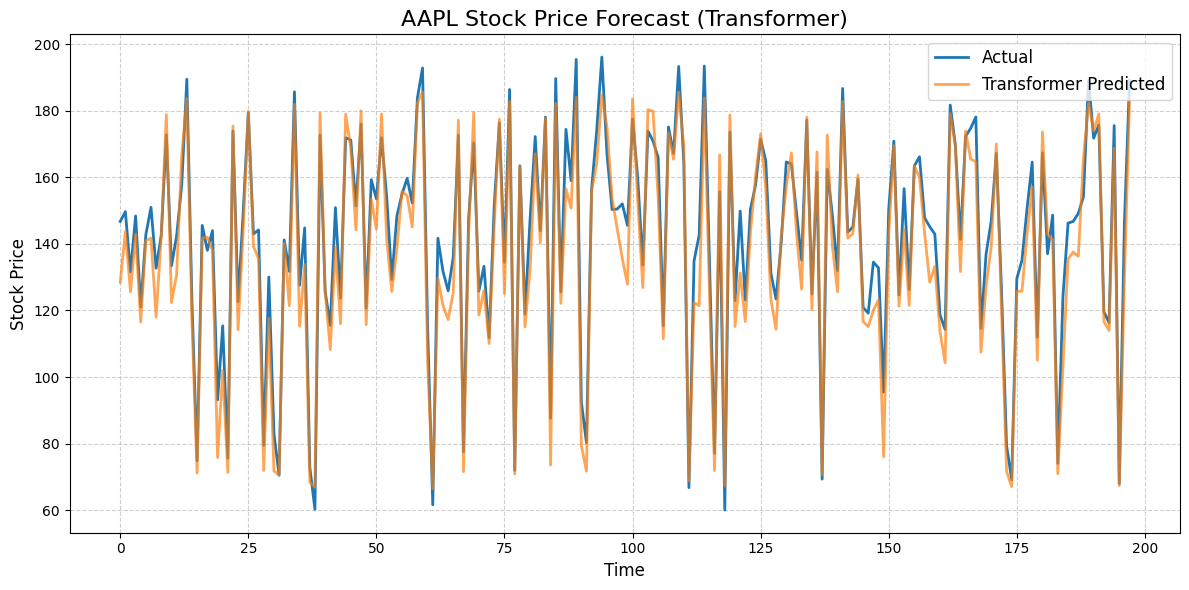

Plot saved as 'plots/v32_AAPL_vision_transformer.png'


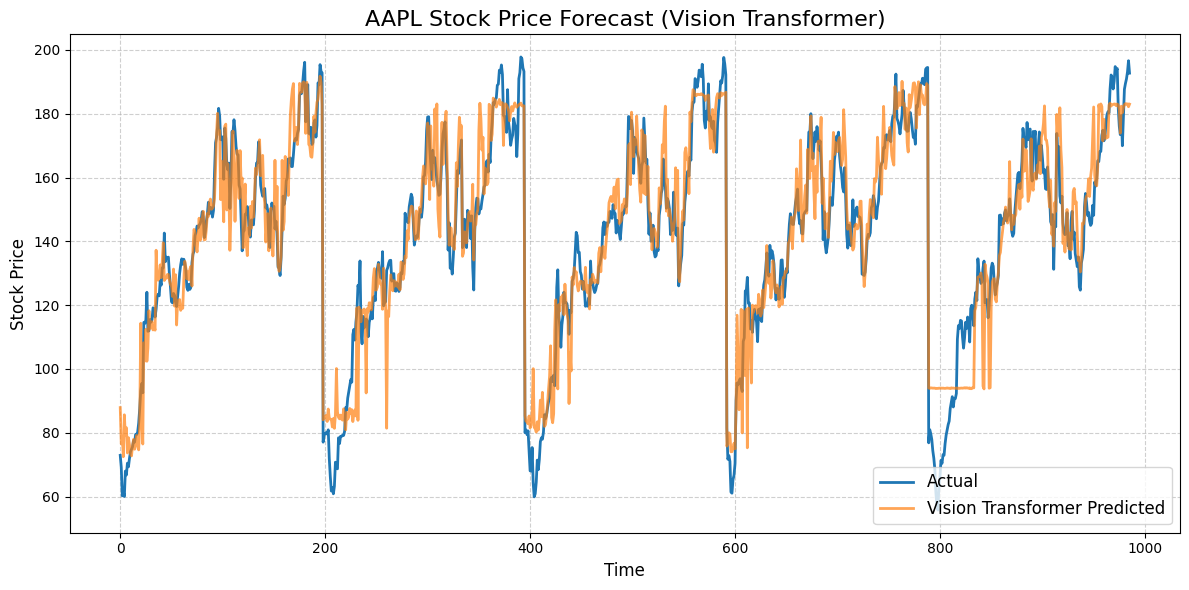

Saving combined metrics...
Combined metrics saved to 'metrics/v32_AAPL_2020-01-01_2023-12-31_combined_metrics.csv'
Generating combined summary...

Stock Price Forecast Summary for AAPL
Version: v32
Period: 2020-01-01 to 2023-12-31

Transformer Model Metrics:
MSE:  68.8899
RMSE: 8.3000
MAE:  6.9960
R2:   0.9302
MAPE: 5.2181%

Vision Transformer Model Metrics:
MSE:  113.6531
RMSE: 10.6608
MAE:  7.8742
R2:   0.8917
MAPE: 6.4136%

Comparative Summary:
- The Transformer model explains 93.02% of the variance, while the Vision Transformer explains 89.17%.
- The Transformer model has an average prediction error of $8.30 (RMSE), compared to $10.66 for the Vision Transformer.
- The Transformer model's predictions are off by an average of 5.22%, while the Vision Transformer's are off by 6.41%.
- Overall, the Transformer model performs better in terms of R2 score and prediction accuracy.

Note: Please refer to the generated plots and metrics file for more details.

Combined summary saved as 'summa

In [9]:
# based on th parse_arg flag - do the call.
if parse_args :
      invoke_ViT_TS_args (default_batch_sz, base_dir, fnm, version_number)